# Data Processing - Assignment 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
csv_df = pd.read_csv('/Users/varsha/Downloads/employees.csv')
csv_df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [3]:
team_categories = csv_df['Team'].astype('category')
team_values = team_categories.value_counts()
team_values

Client Services         106
Finance                 102
Business Development    101
Marketing                98
Product                  95
Sales                    94
Engineering              92
Human Resources          91
Distribution             90
Legal                    88
Name: Team, dtype: int64

In [4]:
teams_salaries = csv_df.groupby('Team').mean()['Salary'].reset_index()
teams_salaries = pd.merge(csv_df, teams_salaries, on='Team')
del teams_salaries['Salary_x']
teams_salaries

,First Name,Gender,Start Date,Last Login Time,Bonus %,Senior Management,Team,Salary_y
0,Douglas,Male,8/6/1993,12:42 PM,6.945,True,Marketing,90435.591837
1,Matthew,Male,9/5/1995,2:12 AM,13.645,False,Marketing,90435.591837
2,Craig,Male,2/27/2000,7:45 AM,7.757,True,Marketing,90435.591837
3,Marilyn,Female,12/7/1980,3:16 AM,5.207,True,Marketing,90435.591837
4,NaN,Female,6/12/2007,5:25 PM,19.414,NaN,Marketing,90435.591837
...,...,...,...,...,...,...,...,...
952,Kenneth,Male,5/10/2006,8:24 AM,1.905,True,Distribution,88500.466667
953,Gerald,NaN,4/15/1989,12:44 PM,17.426,True,Distribution,88500.466667
954,NaN,Female,9/15/1985,1:50 AM,16.941,NaN,Distribution,88500.466667
955,Louise,Female,3/27/1995,10:27 PM,11.671,False,Distribution,88500.466667


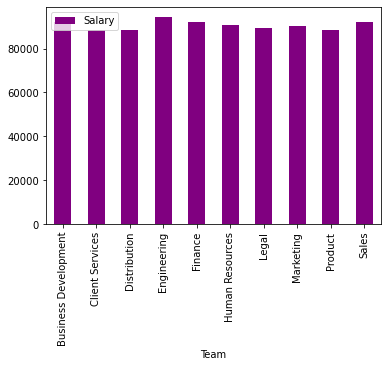

In [5]:
temp = csv_df.groupby('Team').mean()['Salary'].reset_index()
temp.plot.bar(x='Team', y='Salary', rot=90, color='purple');

In [6]:
csv_df['Start Date'] = pd.to_datetime(csv_df['Start Date'])
csv_df['Start Date']

0     1993-08-06
1     1996-03-31
2     1993-04-23
3     2005-03-04
4     1998-01-24
         ...    
995   2014-11-23
996   1984-01-31
997   2013-05-20
998   2013-04-20
999   2012-05-15
Name: Start Date, Length: 1000, dtype: datetime64[ns]

In [7]:
bonus_time_series = csv_df[['Bonus %']]
bonus_time_series.index = csv_df['Start Date']
bonus_time_series.sort_index()

,Bonus %
Start Date,
1980-01-19,1.148
1980-01-24,3.055
1980-01-28,6.318
1980-02-20,18.225
1980-02-25,3.186
...,...
2016-05-12,17.612
2016-05-24,7.008
2016-06-05,1.256


<AxesSubplot:xlabel='Start Date', ylabel='Bonus %'>

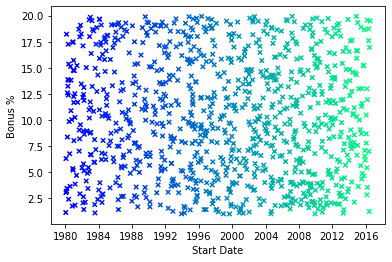

In [8]:
bonus_time_series.reset_index().plot.scatter(x='Start Date',y='Bonus %',c='Start Date',colormap='winter',marker='x')

In [9]:
bonus_time_series[bonus_time_series.index < pd.to_datetime('Jan 1 2008')]

,Bonus %
Start Date,
1993-08-06,6.945
1996-03-31,4.170
1993-04-23,11.858
2005-03-04,9.340
1998-01-24,1.389
...,...
1991-02-10,3.794
1987-07-24,10.982
2002-08-25,11.051


In [10]:
bonus_time_series.resample('3M',closed='right').mean()

,Bonus %
Start Date,
1980-01-31,3.507000
1980-04-30,10.426857
1980-07-31,10.192750
1980-10-31,12.474500
1981-01-31,11.314000
...,...
2015-07-31,10.327500
2015-10-31,10.002500
2016-01-31,9.347143
